# Time Series Analysis

In [1]:
%pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.9 MB/s eta 0:00:00


In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

## Time Series Decomposition

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/AirPassengers.csv"
df = pd.read_csv(url, index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


### Visualize the time series data

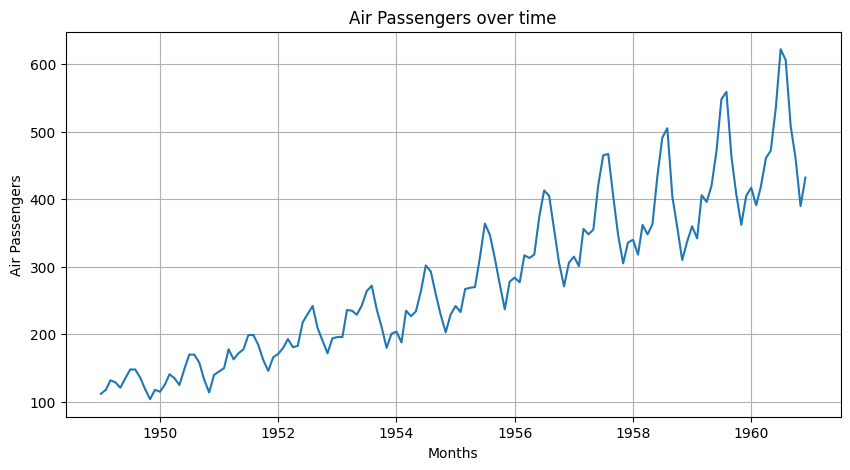

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df['Passengers'])
plt.xlabel('Months')
plt.ylabel("Air Passengers")
plt.title("Air Passengers over time")
plt.grid()
plt.show()

![image.png](attachment:image.png)

### Use multiplicative model for above time series

### Decomposition

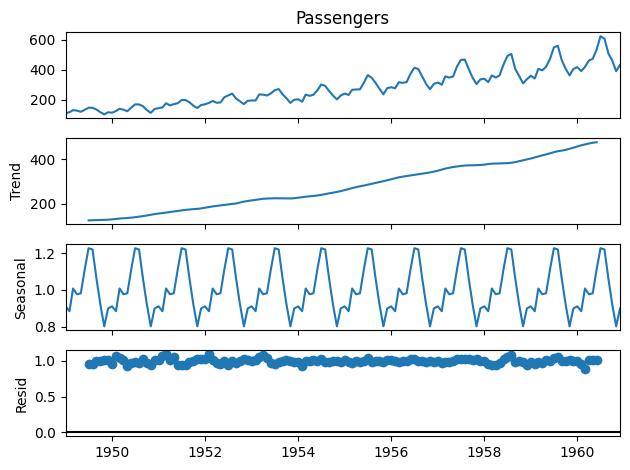

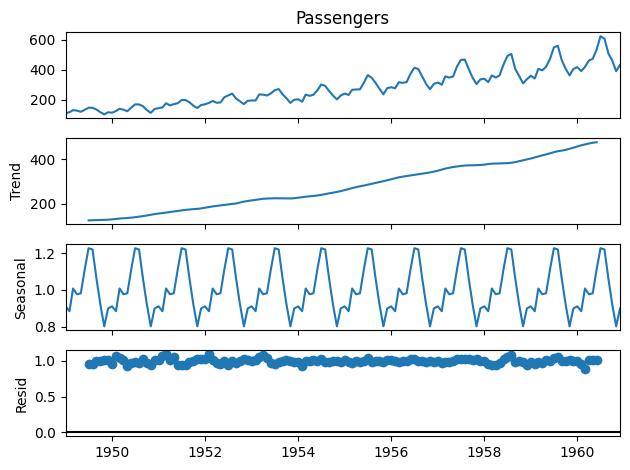

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
Q = seasonal_decompose(df['Passengers'], model="multiplicative")
Q.plot()

In [7]:
Q.observed

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [8]:
Q.trend[10:]

,trend
Month,
1949-11-01,129.000000
1949-12-01,129.750000
1950-01-01,131.250000
1950-02-01,133.083333
1950-03-01,134.916667
1950-04-01,136.416667
1950-05-01,137.416667
1950-06-01,138.750000
1950-07-01,140.916667


In [9]:
Q.seasonal

,seasonal
Month,
1949-01-01,0.910230
1949-02-01,0.883625
1949-03-01,1.007366
1949-04-01,0.975906
1949-05-01,0.981378
1949-06-01,1.112776
1949-07-01,1.226556
1949-08-01,1.219911
1949-09-01,1.060492


In [10]:
Q.resid[10:]

,resid
Month,
1949-11-01,1.006270
1949-12-01,1.011812
1950-01-01,0.962603
1950-02-01,1.071467
1950-03-01,1.037447
1950-04-01,1.014048
1950-05-01,0.926903
1950-06-01,0.965041
1950-07-01,0.983557


### Trend plot

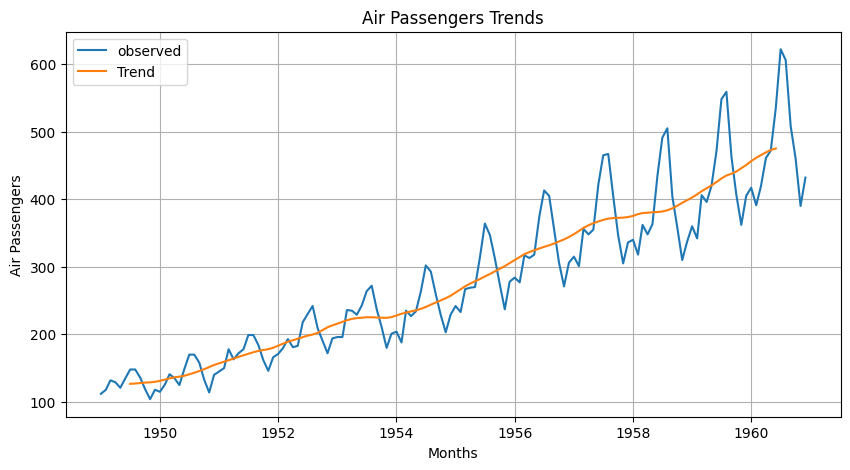

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(Q.observed, label='observed')
plt.plot(Q.trend, label='Trend')
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Trends')
plt.legend()
plt.grid()
plt.show()

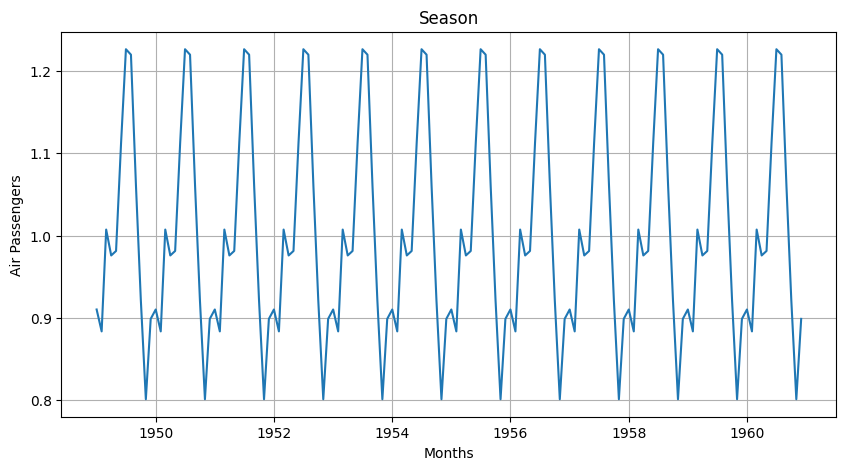

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(Q.seasonal)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Season')
plt.grid()
plt.show()

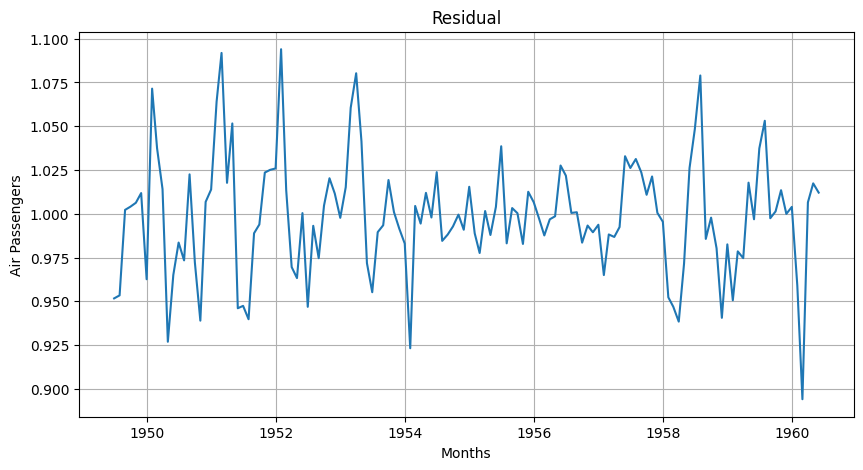

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(Q.resid)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Residual')
plt.grid()
plt.show()

# Forecasting - main goal here is to estimate future values with confidence interval

In [14]:
from pmdarima.arima import auto_arima
model = auto_arima(df['Passengers'], seasonal=True, m=12)

In [15]:
model.order

(2, 1, 1)

### Provide a forecast for next 4 years i.e. 12*4 = 48 months

In [16]:
forecast, conf = model.predict(n_periods=48, return_conf_int=True)

In [19]:
forecast

,0
1961-01-01,445.634934
1961-02-01,420.395024
1961-03-01,449.198348
1961-04-01,491.839976
1961-05-01,503.394502
1961-06-01,566.862471
1961-07-01,654.260189
1961-08-01,638.597493
1961-09-01,540.883739
1961-10-01,494.126610


In [20]:
conf

array([[423.34484757, 467.92501952],
       [394.23539679, 446.55465213],
       [419.83171141, 478.56498452],
       [460.37625926, 523.30369276],
       [470.38045292, 536.40855182],
       [532.69931939, 601.02562216],
       [619.22112948, 689.29924892],
       [602.87983183, 674.31515457],
       [504.63120707, 577.13627077],
       [457.44583825, 530.80738157],
       [386.30372821, 460.36165208],
       [428.1911891 , 502.82391072],
       [433.49735818, 525.08434836],
       [405.10869698, 503.24497681],
       [431.1554372 , 535.01852521],
       [471.84033434, 579.79816045],
       [481.87334967, 593.02801195],
       [544.15634767, 657.81146303],
       [630.60850683, 746.26548123],
       [614.17889589, 731.46366422],
       [515.83210925, 634.46267142],
       [468.54379213, 588.30438119],
       [397.29693225, 518.02080357],
       [439.07958457, 560.63657678],
       [446.3268565 , 580.99723894],
       [418.31792814, 558.81320108],
       [444.62395763, 590.35721439],
 

In [21]:
forecast = forecast.to_frame()
forecast.columns = ['Forecast']
forecast[['Lower Bound', 'Upper Bound']] = conf
forecast.head()

,Forecast,Lower Bound,Upper Bound
1961-01-01,445.634934,423.344848,467.925020
1961-02-01,420.395024,394.235397,446.554652
1961-03-01,449.198348,419.831711,478.564985
1961-04-01,491.839976,460.376259,523.303693
1961-05-01,503.394502,470.380453,536.408552


In [22]:
forecast = forecast.apply(round)

In [23]:
forecast

,Forecast,Lower Bound,Upper Bound
1961-01-01,446.0,423.0,468.0
1961-02-01,420.0,394.0,447.0
1961-03-01,449.0,420.0,479.0
1961-04-01,492.0,460.0,523.0
1961-05-01,503.0,470.0,536.0
1961-06-01,567.0,533.0,601.0
1961-07-01,654.0,619.0,689.0
1961-08-01,639.0,603.0,674.0
1961-09-01,541.0,505.0,577.0
1961-10-01,494.0,457.0,531.0


In [24]:
forecast.to_csv("Forecast.csv")

### Plotting above results

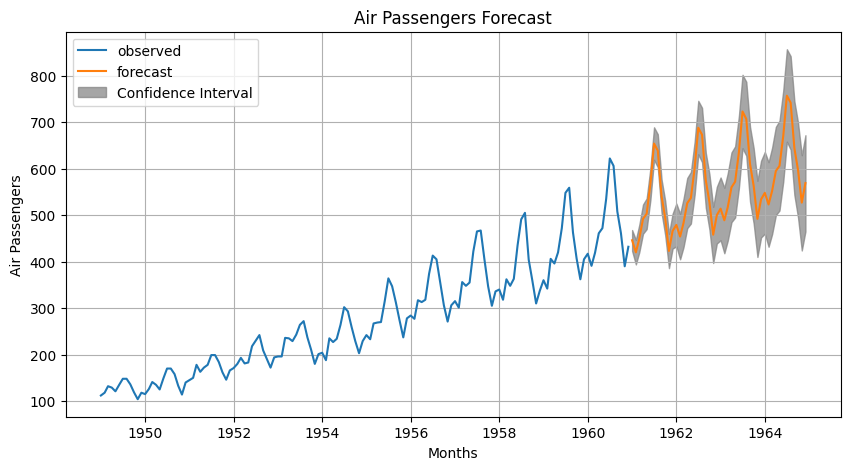

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(df["Passengers"], label='observed')
plt.plot(forecast["Forecast"], label='forecast')
plt.fill_between(
    forecast.index,
    forecast['Lower Bound'],
    forecast['Upper Bound'],
    color='gray',
    alpha=0.7,
    label="Confidence Interval"
)
plt.xlabel('Months')
plt.ylabel('Air Passengers')
plt.title('Air Passengers Forecast')
plt.legend(loc='upper left')
plt.grid()
plt.show()